In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Import Dataset
df = pd.read_csv('SBAnational.csv')
pd.set_option('max_columns',100)
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross  \
0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00    
1         N      Y        NaN        31-May-97       $40,000.00        $0.00    
2         N      N        NaN        31-Dec-97      $287,000.00        $0.00    
3         N      Y        NaN        30-Jun-97       $35,000.00        $0.00    
4         N      N        NaN        14-May-97      $229,000.00        $0.00    

  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0      P I F       $0.00    $60,000.00    $48,000.00   
1      P I F       $0.00    $40,000.00    $32,000.00   
2      P I F       $0.00   $287,000.00   $215,250.00   
3      P I F       $0.00    $35,000.00    $28,000.00   
4      P I F       $0.00   $229,000.00   $229,000.00

In [31]:
df.describe()

LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       1.000000   
75%        10.000000       2.000000       1.000000       4.000000   
max      9999.000000       2.000000    8800.000000    9500.000000   

       FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  
mean     2753.725933       0.757748  
std     12758.019136       0.646436  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max     99999.000000       2.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
LoanNr_ChkDgt        899164 non-null int64
Name                 899150 non-null object
City                 899134 non-null object
State                899150 non-null object
Zip                  899164 non-null int64
Bank                 897605 non-null object
BankState            897598 non-null object
NAICS                899164 non-null int64
ApprovalDate         899164 non-null object
ApprovalFY           899164 non-null object
Term                 899164 non-null int64
NoEmp                899164 non-null int64
NewExist             899028 non-null float64
CreateJob            899164 non-null int64
RetainedJob          899164 non-null int64
FranchiseCode        899164 non-null int64
UrbanRural           899164 non-null int64
RevLineCr            894636 non-null object
LowDoc               896582 non-null object
ChgOffDate           162699 non-null object
DisbursementDate 

# 1. EDA and Preprocessing



### 1.1.  Remove Unecessary Sign ( $ and , )

In [5]:
# Remove dollar sign at coloumns Disbursement Gross, Balance Gross, ChgOffPrinGr, GrAppv, SBA_Appv

def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

In [6]:
# Check column ApprovalFY (mixed string and int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

### 1.2.  Change ApprovalFY to year (int)

In [7]:
# Change ApprovalFY to year (int)

def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])
    
df['ApprovalFY'] = df.apply(change_year,axis=1)

### 1.3.  Change NAICS Code

Because of the first two digits of the NAICS classification represent the economic sector. So, we only need the first two digit of that code. The description of the following code could we see in the table below :

<img src="fix_naics.jpg">

In [8]:
temp = []
for item in df['NAICS']:
    if item == 0 :
        temp.append(0)
    else :
        a = list(str(item))[:2]
        b = int(''.join(a))
        if (b == 31) | (b == 32) | (b == 33):
            temp.append(31)
        elif (b == 44) | (b == 45):
            temp.append(44)
        elif (b == 48) | (b == 49):
            temp.append(48)
        else:
            temp.append(b)

df['NAICS'] = temp

### 1.4.  Relation Between Year and MIS_Status

First things to remember : This dataset provide untill 2014 because in general loan funds take 5 years or more to be paid back. Therefore the 2019 data are the loans that were disbursed 5 years ago (2014)


To retrieve the latest time span from data, we can retrieve data **from 2000 and above.**

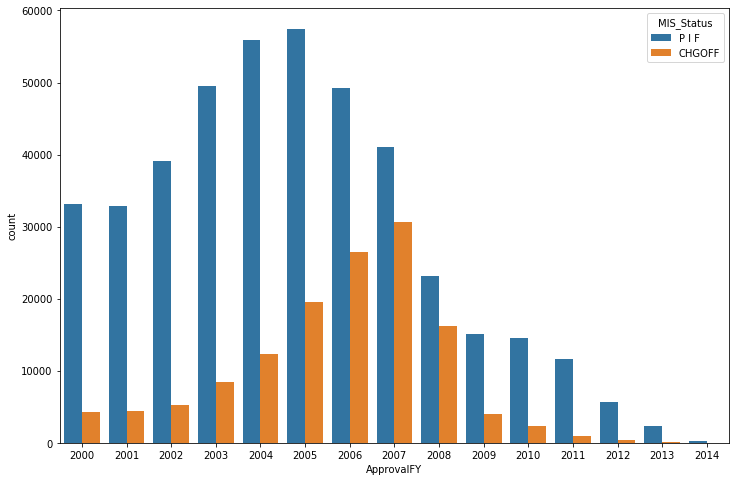

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['ApprovalFY'] >= 2000],x='ApprovalFY',hue='MIS_Status')

> The Great Recession refers to the economic downturn from 2007 to 2009 after the bursting of the U.S. housing bubble and the global financial crisis.

> So make sense why in 2007 and 2008 the number of CGHOFF was high. **This is caused by The Great Recession.**


### 1.5.  Relation CHGOFF and Business Sector (2006 and 2007)

The reason that I choose 2006 and 2007 because that time is the beginning of The Great Recession. We can see higher number of CHGOFF at that year than the others. I have assumption at 2006 and 2007, there are some businesses that cannot pay their debt then triggers great recession. And my assumption supported by article from detik.finance :
> "Dipicu oleh perubahan arah kebijakan moneter AS yang mulai berubah menjadi ketat memasuki pertengahan 2004, tren peningkatan suku bunga mulai terjadi dan terus berlangsung sampai dengan 2006. Kondisi ini pada akhirnya memberi pukulan berat pada pasar perumahan AS, yang ditandai dengan banyaknya debitur yang mengalami gagal bayar. Gelombang gagal bayar yang terjadi bersamaan dengan jatuhnya harga rumah di AS, akhirnya menyeret semua investor maupun lembaga yang terlibat dalam penjaminan ke dalam persoalan likuiditas yang sangat besar." Reference : https://finance.detik.com/moneter/d-1115753/kronologi-dan-latar-belakang-krisis-finansial-global

Text(0.5, 1.0, 'Total Loan CHGOFF 2007 by Business Sector')

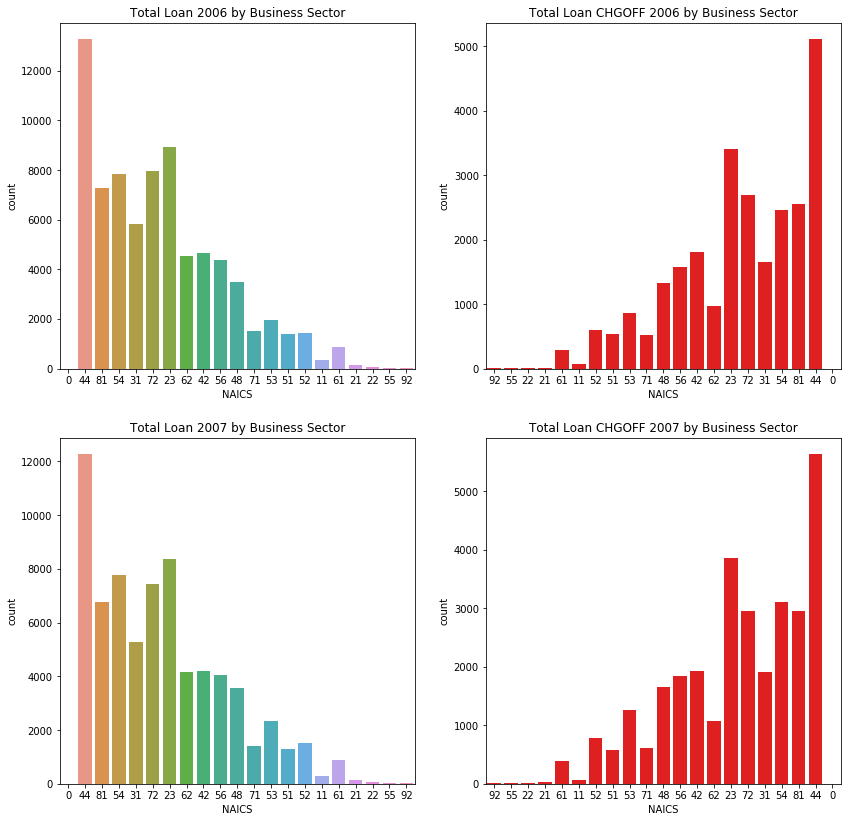

In [10]:
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
sns.countplot(data=df[df['ApprovalFY'] == 2006],x='NAICS',order=df['NAICS'].value_counts().index)
plt.title('Total Loan 2006 by Business Sector')

plt.subplot(2,2,2)
sns.countplot(data=df[(df['ApprovalFY'] == 2006) & (df['MIS_Status'] == 'CHGOFF')],x='NAICS',color='r',order=df['NAICS'].value_counts(ascending=True).index)
plt.title('Total Loan CHGOFF 2006 by Business Sector')

plt.subplot(2,2,3)
sns.countplot(data=df[df['ApprovalFY'] == 2007],x='NAICS',order=df['NAICS'].value_counts().index)
plt.title('Total Loan 2007 by Business Sector')

plt.subplot(2,2,4)
sns.countplot(data=df[(df['ApprovalFY'] == 2007) & (df['MIS_Status'] == 'CHGOFF')],x='NAICS',color='r',order=df['NAICS'].value_counts(ascending=True).index)
plt.title('Total Loan CHGOFF 2007 by Business Sector')

> From this we can say that there are some condition that match with that article like the sector real estate more than half loan are CHGOFF, then business sector like construction that really close to that topics has a large numbers of CHGOFF. This will effect other business sector like retail/professional/etc. And, from this visualization we can say too that business sector (NAICS) is one of the important feature from this dataset.

### 1.6.  Dataset Restrictions by Year

From here we will limit our datasets from 2000 and above. But I will discard 2006-2009 which in my opinion could be biased due to too large CHGOFF in that year caused by The Great Recession.

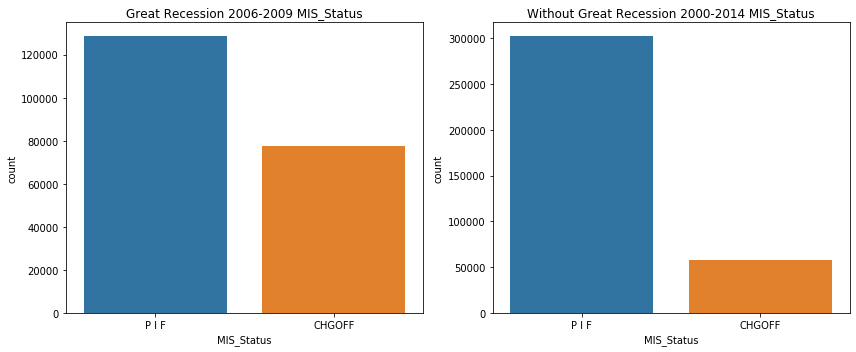

In [11]:
# --- Data without Great Recession Effect (main data )
df00_14 = df[(df['ApprovalFY'] == 2000) | (df['ApprovalFY'] == 2001) | (df['ApprovalFY'] == 2002) |
  (df['ApprovalFY'] == 2003) | (df['ApprovalFY'] == 2004) | (df['ApprovalFY'] == 2005) | 
  (df['ApprovalFY'] == 2010) | (df['ApprovalFY'] == 2011) | (df['ApprovalFY'] == 2012) | (df['ApprovalFY'] == 2013)
  | (df['ApprovalFY'] == 2014)]

# --- Data with Great Recession Effect (for exploratory)
df06_09 = df[(df['ApprovalFY'] == 2006) | (df['ApprovalFY'] == 2007) | (df['ApprovalFY'] == 2008) | (df['ApprovalFY'] == 2009)]
df06_09

# -- Plot the difference
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(df06_09['MIS_Status'])
plt.title('Great Recession 2006-2009 MIS_Status')

plt.subplot(1,2,2)
sns.countplot(df00_14['MIS_Status'])
plt.title('Without Great Recession 2000-2014 MIS_Status')

plt.tight_layout()

In [12]:
# our main dataset information
df00_14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361309 entries, 495 to 899107
Data columns (total 27 columns):
LoanNr_ChkDgt        361309 non-null int64
Name                 361306 non-null object
City                 361309 non-null object
State                361309 non-null object
Zip                  361309 non-null int64
Bank                 361303 non-null object
BankState            361303 non-null object
NAICS                361309 non-null int64
ApprovalDate         361309 non-null object
ApprovalFY           361309 non-null int64
Term                 361309 non-null int64
NoEmp                361309 non-null int64
NewExist             361173 non-null float64
CreateJob            361309 non-null int64
RetainedJob          361309 non-null int64
FranchiseCode        361309 non-null int64
UrbanRural           361309 non-null int64
RevLineCr            360789 non-null object
LowDoc               360176 non-null object
ChgOffDate           59995 non-null object
DisbursementDate 

### 1.7.  Real Estate Feature

I will make a feature that called RealEstate, it means that the loan is backed up with real estate or not. From journal that I've read the loan that have term more than 240 month will be backed up with real estate. I think it is one of the important feature to this dataset too.

- RealEstate = 1 (Backed up with real estate)
- RealEstate = 0 (not Backed up with real estate)

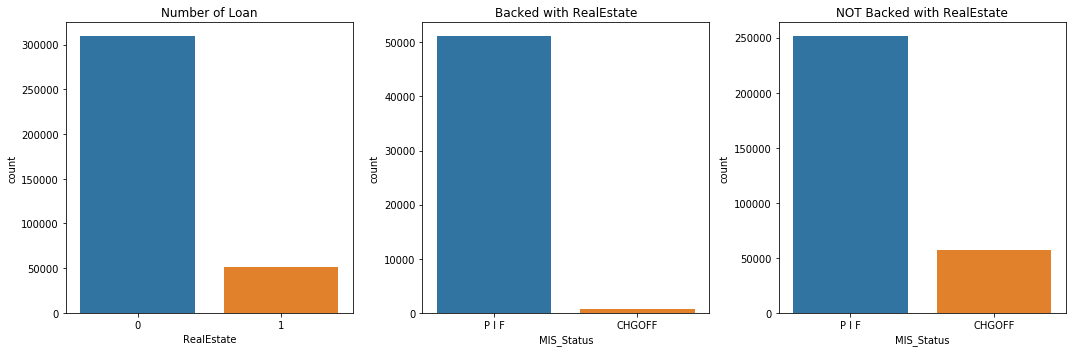

In [13]:
# real restate

def real_estate(x) :
    if x['Term'] >= 240:
        return 1
    else:
        return 0
    
df00_14['RealEstate'] = df00_14.apply(real_estate,axis=1)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(df00_14['RealEstate'])
plt.title('Number of Loan')

plt.subplot(1,3,2)
sns.countplot(df00_14[df00_14['RealEstate'] == 1]['MIS_Status'])
plt.title('Backed with RealEstate')

plt.subplot(1,3,3)
sns.countplot(df00_14[df00_14['RealEstate'] == 0]['MIS_Status'])
plt.title('NOT Backed with RealEstate')


plt.tight_layout()

> we can see here that the loan that backed up with real estate have lower percentage CHGOFF than the loan that not backed up with real estate.

### 1.8.  Drop Some Columns and Fix NaN Values

There are some colums that need to drop because in my opnion they will not give effect to loan status that will paid in full or charged off. That columns are :
- Name
- City
- Zip
- Bank
- Bank State
- Approval Date
- CreateJob
- RetainedJob
- RevLineCr
- DisbursementDate
- Balance Gross
- ChargeOff

In [14]:
df_semi = df00_14.drop(['Name','City','Zip','Bank','BankState','ApprovalDate','CreateJob','RetainedJob','RevLineCr','ChgOffDate','DisbursementDate','BalanceGross','ChgOffPrinGr'],axis=1)
df_semi

LoanNr_ChkDgt State  NAICS  ApprovalFY  Term  NoEmp  NewExist  \
495        1003825001    NY     72        2000    84      6       1.0   
496        1003835004    NH     42        2000   240      3       1.0   
497        1003845007    NY     31        2000    65      1       1.0   
499        1003855010    ME     44        2000    84      3       1.0   
500        1003865002    NY     44        2000    84      8       2.0   
...               ...   ...    ...         ...   ...    ...       ...   
852682     9142924007    CA     62        2005   247      6       1.0   
852686     9142994006    FL     72        2005   113     12       2.0   
852688     9143074003    TX     62        2005    84     10       1.0   
852690     9143084006    IA     44        2005    64      3       2.0   
899107     9994623004    AL      0        2001    84     21       1.0   

        FranchiseCode  UrbanRural LowDoc  DisbursementGross MIS_Status  \
495                 1           1      N            50800.0      P I F   
496                 1           1      N            65000.0      P I F   
497                 1           1      N            78800.0     CHGOFF   
499                 1           1      N           105000.0      P I F   
500                 1           1      N            25000.0      P I F   
...               ...         ...    ...                ...        ...   
852682              1           1      N          1136000.0     CHGOFF   
852686          68020           1      Y           150000.0     CHGOFF   
852688          38615           1      Y           100000.0      P I F   
852690              1           1      N           160000.0     CHGOFF   
899107              1           0      N           100000.0      P I F   

           GrAppv  SBA_Appv  RealEstate  
495       50800.0   25400.0           0  
496       65000.0   32500.0           1  
497       78800.0   39400.0           0  
499      105000.0   52500.0           0  
500       25000.0   12500.0           0  
...           ...       ...         ...  
852682  1223000.0  917250.0           1  
852686   150000.0  127500.0           0  
852688   100000.0   85000.0           0  
852690   160000.0  120000.0           0  
899107   100000.0   75000.0           0  

[361309 rows x 15 columns]

**Fix NaN Value**

- Because LowDoc have some data which has NaN values so we must fill or drop. Because the amount of LowDoc data that is NaN values does not reach 1%. Then we just drop the NAN value
- NaN values at MIS_status so weird, because of that data has the DisbursementGross that very much different than ApprovalGr. So I decided to drop too the NaN value from MIS_status

In [15]:
# -- Dropna at LowDoc and MIS_Status
df_semi.dropna(subset=['LowDoc','MIS_Status'],axis=0,inplace=True)

# -- Because the amount of nanvalue in nxt is very small (131 out of 300K data)
df_semi.dropna(subset=['NewExist'],axis=0,inplace=True)

# check df_semi information (no nan values anymore)
df_semi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359004 entries, 495 to 899107
Data columns (total 15 columns):
LoanNr_ChkDgt        359004 non-null int64
State                359004 non-null object
NAICS                359004 non-null int64
ApprovalFY           359004 non-null int64
Term                 359004 non-null int64
NoEmp                359004 non-null int64
NewExist             359004 non-null float64
FranchiseCode        359004 non-null int64
UrbanRural           359004 non-null int64
LowDoc               359004 non-null object
DisbursementGross    359004 non-null float64
MIS_Status           359004 non-null object
GrAppv               359004 non-null float64
SBA_Appv             359004 non-null float64
RealEstate           359004 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 43.8+ MB


### 1.9.  Finishing Preprocessing (Create Dummy Variable and Final DataFrame)


###### 1.9.1 NewExist

From table information we know that NewExist (1 = Existing Business, 2 = New Business). This represents whether the business is an existing business (in exis- tence for more than 2 years) or a new business (in existence for less than or equal to 2 years). Will will change that to :

- Existing Business = 1 (from 1)
- New Businees = 0 (from 2)

But before that, we need to remove some value that not defined

In [16]:
# NewExist = 0 not defined what it means, because it is only small number of data, I decided to drop it
df_semi['NewExist'].value_counts()

1.0    264944
2.0     93590
0.0       470
Name: NewExist, dtype: int64

In [17]:
# -- Drop NewExist = 0
index_exist0 = []
for item in list(df_semi[df_semi['NewExist'] == 0].index):
    index_exist0.append(item)

df_semi.drop(index_exist0,inplace=True)

# -- Change newExist
def change_newexist(x):
    if x == 1:
        return 1
    else:
        return 0
df_semi['NewExist'] = df_semi['NewExist'].apply(lambda x : change_newexist(x))

###### 1.9.2 Franchise

From table information we know that Franchise code, (00000 or 00001) = Nofranchise. So I decided to separate the Franchise to be :

- FranchiseCode = 1 (have franchise)
- FranchiseCode = 0 (no franchise)

In [18]:
# -- change franchise

def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

df_semi['FranchiseCode'] = df_semi['FranchiseCode'].apply(lambda x: change_franchise(x))

###### 1.9.3 LowDoc

After checking LowDoc there are some value that not defined as 'N' or 'Y'. That codes are C,S,A,R,and0 which are not defined and dont know what that code means. Because of the number of that values are not too much (could see on the cell below). So, I decided to drop it too.

In [19]:
df_semi['LowDoc'].value_counts()

N    318520
Y     39256
C       503
S       206
A        28
R        20
0         1
Name: LowDoc, dtype: int64

In [20]:
index_drop_lowdoc = []
for index in list(df_semi[(df_semi['LowDoc'] != 'N') & (df_semi['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

df_semi.drop(index_drop_lowdoc,inplace=True)

###### 1.9.4 Get Dummies for UrbanRural and LowDoc

In [21]:
df_semi = pd.get_dummies(data=df_semi,columns=['UrbanRural','LowDoc'],drop_first=True)
df_semi

LoanNr_ChkDgt State  NAICS  ApprovalFY  Term  NoEmp  NewExist  \
495        1003825001    NY     72        2000    84      6         1   
496        1003835004    NH     42        2000   240      3         1   
497        1003845007    NY     31        2000    65      1         1   
499        1003855010    ME     44        2000    84      3         1   
500        1003865002    NY     44        2000    84      8         0   
...               ...   ...    ...         ...   ...    ...       ...   
852682     9142924007    CA     62        2005   247      6         1   
852686     9142994006    FL     72        2005   113     12         0   
852688     9143074003    TX     62        2005    84     10         1   
852690     9143084006    IA     44        2005    64      3         0   
899107     9994623004    AL      0        2001    84     21         1   

        FranchiseCode  DisbursementGross MIS_Status     GrAppv  SBA_Appv  \
495                 0            50800.0      P I F    50800.0   25400.0   
496                 0            65000.0      P I F    65000.0   32500.0   
497                 0            78800.0     CHGOFF    78800.0   39400.0   
499                 0           105000.0      P I F   105000.0   52500.0   
500                 0            25000.0      P I F    25000.0   12500.0   
...               ...                ...        ...        ...       ...   
852682              0          1136000.0     CHGOFF  1223000.0  917250.0   
852686              1           150000.0     CHGOFF   150000.0  127500.0   
852688              1           100000.0      P I F   100000.0   85000.0   
852690              0           160000.0     CHGOFF   160000.0  120000.0   
899107              0           100000.0      P I F   100000.0   75000.0   

        RealEstate  UrbanRural_1  UrbanRural_2  LowDoc_Y  
495              0             1             0         0  
496              1             1             0         0  
497              0             1             0         0  
499              0             1             0         0  
500              0             1             0         0  
...            ...           ...           ...       ...  
852682           1             1             0         0  
852686           0             1             0         1  
852688           0             1             0         1  
852690           0             1             0         0  
899107           0             0             0         0  

[357776 rows x 16 columns]

### 1.10.  Distribution of NoEmp compare to MIS_Status

###### 1.10.1  Check all distribution of NoEmp

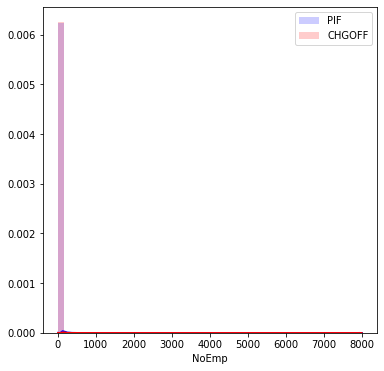

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(df_semi[df_semi['MIS_Status'] == 'P I F']['NoEmp'],hist_kws=dict(alpha=0.2),color='blue',label='PIF')
sns.distplot(df_semi[df_semi['MIS_Status'] == 'CHGOFF']['NoEmp'],hist_kws=dict(alpha=0.2),color='red',label='CHGOFF')
plt.legend()

From the distribution of NoEmp we could see there are some outliers. Companies with more than 1500 employees are not eligible for SBA loans. References :

> "According to the SBA, a small businesses have a maximum of anywhere between 250 and 1500 employees— all depending on the specific industry the business is in. Additionally, businesses have revenue limits that they must not exceed if they want to qualify for SBA financing. In general, companies with more than 1500 employees are not eligible for SBA loans." **References :** https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

###### 1.10.2  Check total of NoEmp that outlier

In [23]:
df_semi[df_semi['NoEmp'] >= 1500]['MIS_Status'].value_counts()

P I F     32
CHGOFF     5
Name: MIS_Status, dtype: int64

###### 1.10.3  Try the Distribution without Outlier

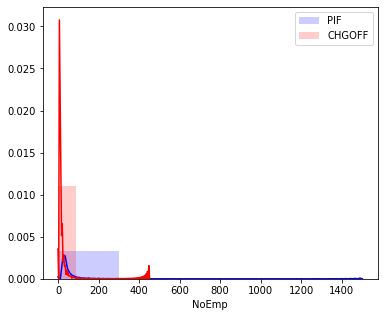

In [24]:
plt.figure(figsize=(6,5))
sns.distplot(df_semi[(df_semi['NoEmp'] <= 1500) & (df_semi['MIS_Status'] == 'P I F')]['NoEmp'],hist_kws=dict(alpha=0.2),color='blue',label='PIF',bins=5)
sns.distplot(df_semi[(df_semi['NoEmp'] <= 1500) & (df_semi['MIS_Status'] == 'CHGOFF')]['NoEmp'],hist_kws=dict(alpha=0.2),color='red',label='CHGOFF',bins=5)
plt.legend()

> Looks better and makes sense. The logic is that the smaller the number of employees the smaller the size of the company, and vice versa. The greater the size of the company, then it can be defined that the business is more stable and less likely to default. So, it can be agreed that NoEmp is also an important feature in determining loan status.

###### 1.10.4  Take out the outlier of NoEmp

In [25]:
df_semi = df_semi[df_semi['NoEmp'] <= 1500]
df_semi

LoanNr_ChkDgt State  NAICS  ApprovalFY  Term  NoEmp  NewExist  \
495        1003825001    NY     72        2000    84      6         1   
496        1003835004    NH     42        2000   240      3         1   
497        1003845007    NY     31        2000    65      1         1   
499        1003855010    ME     44        2000    84      3         1   
500        1003865002    NY     44        2000    84      8         0   
...               ...   ...    ...         ...   ...    ...       ...   
852682     9142924007    CA     62        2005   247      6         1   
852686     9142994006    FL     72        2005   113     12         0   
852688     9143074003    TX     62        2005    84     10         1   
852690     9143084006    IA     44        2005    64      3         0   
899107     9994623004    AL      0        2001    84     21         1   

        FranchiseCode  DisbursementGross MIS_Status     GrAppv  SBA_Appv  \
495                 0            50800.0      P I F    50800.0   25400.0   
496                 0            65000.0      P I F    65000.0   32500.0   
497                 0            78800.0     CHGOFF    78800.0   39400.0   
499                 0           105000.0      P I F   105000.0   52500.0   
500                 0            25000.0      P I F    25000.0   12500.0   
...               ...                ...        ...        ...       ...   
852682              0          1136000.0     CHGOFF  1223000.0  917250.0   
852686              1           150000.0     CHGOFF   150000.0  127500.0   
852688              1           100000.0      P I F   100000.0   85000.0   
852690              0           160000.0     CHGOFF   160000.0  120000.0   
899107              0           100000.0      P I F   100000.0   75000.0   

        RealEstate  UrbanRural_1  UrbanRural_2  LowDoc_Y  
495              0             1             0         0  
496              1             1             0         0  
497              0             1             0         0  
499              0             1             0         0  
500              0             1             0         0  
...            ...           ...           ...       ...  
852682           1             1             0         0  
852686           0             1             0         1  
852688           0             1             0         1  
852690           0             1             0         0  
899107           0             0             0         0  

[357741 rows x 16 columns]

### 1.11.  Gross Disbursement and GrAppv Differences

###### 1.11.1  Check GrDisbursement that less and euals with GrAppv

In [26]:
def check_diff(x):
    if x['DisbursementGross'] < x['GrAppv'] :
        return True
    else :
        return False
        
df_semi['CheckDiff'] = df_semi.apply(check_diff,axis=1)

# check how many 
print('DisbursementGross less than GrAppv, total : ',len(df_semi[df_semi['CheckDiff'] == True ]), ' from  : ',len(df_semi))
print()
print('DisbursementGross equals with GrAppv, total : ',len(df_semi[df_semi['CheckDiff'] == False ]), ' from  : ',len(df_semi))

DisbursementGross less than GrAppv, total :  22485  from  :  357741

DisbursementGross equals with GrAppv, total :  335256  from  :  357741


> I decided to use the data which Gross Disbursement equals with GrAppv, because I categorize the data that have disbursement gross less than GrAppv as an outlier/bias

###### 1.11.2  Using data that have gross disbursement equals to GrAppv

In [27]:
df_semi = df_semi[df_semi['CheckDiff'] == False ]
df_semi

LoanNr_ChkDgt State  NAICS  ApprovalFY  Term  NoEmp  NewExist  \
495        1003825001    NY     72        2000    84      6         1   
496        1003835004    NH     42        2000   240      3         1   
497        1003845007    NY     31        2000    65      1         1   
499        1003855010    ME     44        2000    84      3         1   
500        1003865002    NY     44        2000    84      8         0   
...               ...   ...    ...         ...   ...    ...       ...   
852679     9142904001    AL     81        2005    84      1         0   
852686     9142994006    FL     72        2005   113     12         0   
852688     9143074003    TX     62        2005    84     10         1   
852690     9143084006    IA     44        2005    64      3         0   
899107     9994623004    AL      0        2001    84     21         1   

        FranchiseCode  DisbursementGross MIS_Status    GrAppv  SBA_Appv  \
495                 0            50800.0      P I F   50800.0   25400.0   
496                 0            65000.0      P I F   65000.0   32500.0   
497                 0            78800.0     CHGOFF   78800.0   39400.0   
499                 0           105000.0      P I F  105000.0   52500.0   
500                 0            25000.0      P I F   25000.0   12500.0   
...               ...                ...        ...       ...       ...   
852679              0            10000.0      P I F   10000.0    8500.0   
852686              1           150000.0     CHGOFF  150000.0  127500.0   
852688              1           100000.0      P I F  100000.0   85000.0   
852690              0           160000.0     CHGOFF  160000.0  120000.0   
899107              0           100000.0      P I F  100000.0   75000.0   

        RealEstate  UrbanRural_1  UrbanRural_2  LowDoc_Y  CheckDiff  
495              0             1             0         0      False  
496              1             1             0         0      False  
497              0             1             0         0      False  
499              0             1             0         0      False  
500              0             1             0         0      False  
...            ...           ...           ...       ...        ...  
852679           0             1             0         0      False  
852686           0             1             0         1      False  
852688           0             1             0         1      False  
852690           0             1             0         0      False  
899107           0             0             0         0      False  

[335256 rows x 17 columns]

### 1.12.  Final Dataset

In [28]:
df_final = df_semi.drop(['LoanNr_ChkDgt','GrAppv','CheckDiff'],axis=1)
df_final

State  NAICS  ApprovalFY  Term  NoEmp  NewExist  FranchiseCode  \
495       NY     72        2000    84      6         1              0   
496       NH     42        2000   240      3         1              0   
497       NY     31        2000    65      1         1              0   
499       ME     44        2000    84      3         1              0   
500       NY     44        2000    84      8         0              0   
...      ...    ...         ...   ...    ...       ...            ...   
852679    AL     81        2005    84      1         0              0   
852686    FL     72        2005   113     12         0              1   
852688    TX     62        2005    84     10         1              1   
852690    IA     44        2005    64      3         0              0   
899107    AL      0        2001    84     21         1              0   

        DisbursementGross MIS_Status  SBA_Appv  RealEstate  UrbanRural_1  \
495               50800.0      P I F   25400.0           0             1   
496               65000.0      P I F   32500.0           1             1   
497               78800.0     CHGOFF   39400.0           0             1   
499              105000.0      P I F   52500.0           0             1   
500               25000.0      P I F   12500.0           0             1   
...                   ...        ...       ...         ...           ...   
852679            10000.0      P I F    8500.0           0             1   
852686           150000.0     CHGOFF  127500.0           0             1   
852688           100000.0      P I F   85000.0           0             1   
852690           160000.0     CHGOFF  120000.0           0             1   
899107           100000.0      P I F   75000.0           0             0   

        UrbanRural_2  LowDoc_Y  
495                0         0  
496                0         0  
497                0         0  
499                0         0  
500                0         0  
...              ...       ...  
852679             0         0  
852686             0         1  
852688             0         1  
852690             0         0  
899107             0         0  

[335256 rows x 14 columns]

> **From here we have finished preprocessing and some exploratory data analysis for preprocessing**

# 2. Others Exploratory Data Analysis

### 2.1 Explore State

In [29]:
# -- import csv that contain state name
states = pd.read_csv('states.csv')


# -- percentage of CHGOFF based on state
gb1 = df_final[df_final['MIS_Status'] == 'CHGOFF'].groupby('State').count()[['MIS_Status']].reset_index()
gb2 = df_final[df_final['MIS_Status'] == 'P I F'].groupby('State').count()[['MIS_Status']].reset_index()
gb_state = pd.merge(gb1,gb2,on='State')
gb_state.rename(columns={'MIS_Status_x':'CHGOFF','MIS_Status_y':'P I F'},inplace=True)

def percent(x):
    a = x['CHGOFF'] / (x['P I F'] + x['CHGOFF'])
    return round(a,3)
gb_state['Percent'] = gb_state.apply(percent,axis=1)


# -- Input State Name based on state code
def apply_name_states(x) :
    return states[states['Code'] == x['State']]['State'].values[0]

gb_state['StateName'] = gb_state.apply(apply_name_states,axis=1)
df_state_MIS = gb_state.copy()


# -- Chloropleth
fig = go.Figure(data=go.Choropleth(
    locations=df_state_MIS['State'], # Spatial coordinates
    z = df_state_MIS['Percent'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'spectral',
    text = df_state_MIS['StateName'],
    colorbar_title = "Percentage",
))

fig.update_layout(
    title_text = 'CGHOFF Percentage per State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()



>  States such as Wyoming and North Dakota had stronger economies (due to their reliance on minerals and oil) which may explain they have the lowest percentage of CHGOFF.

> So the plan is later we can try machine learning for the whole country or we could try for several states with the same percentage which are Arizona and Kansas from yellow zone, Wyoming and North Dakota from Red Zone, and Georgia and Florida from DarkGreen zone

### 2.2 Total DisbursementGross per Year

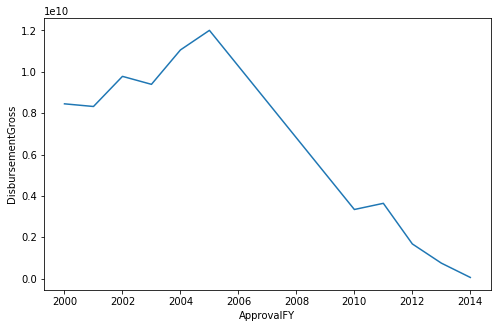

In [30]:
df_final.groupby('ApprovalFY').sum()['DisbursementGross'].reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=df_final.groupby('ApprovalFY').sum()['DisbursementGross'].reset_index()['ApprovalFY'],y=df_final.groupby('ApprovalFY').sum()['DisbursementGross'].reset_index()['DisbursementGross'])

> On the line plot, we can see that there was a decrease in loans disbursed after the great recession (2006-2009). This can also be caused by lenders who are increasingly selective in withdrawing loan funds.

### 2.3 Disbursement Distribution per State

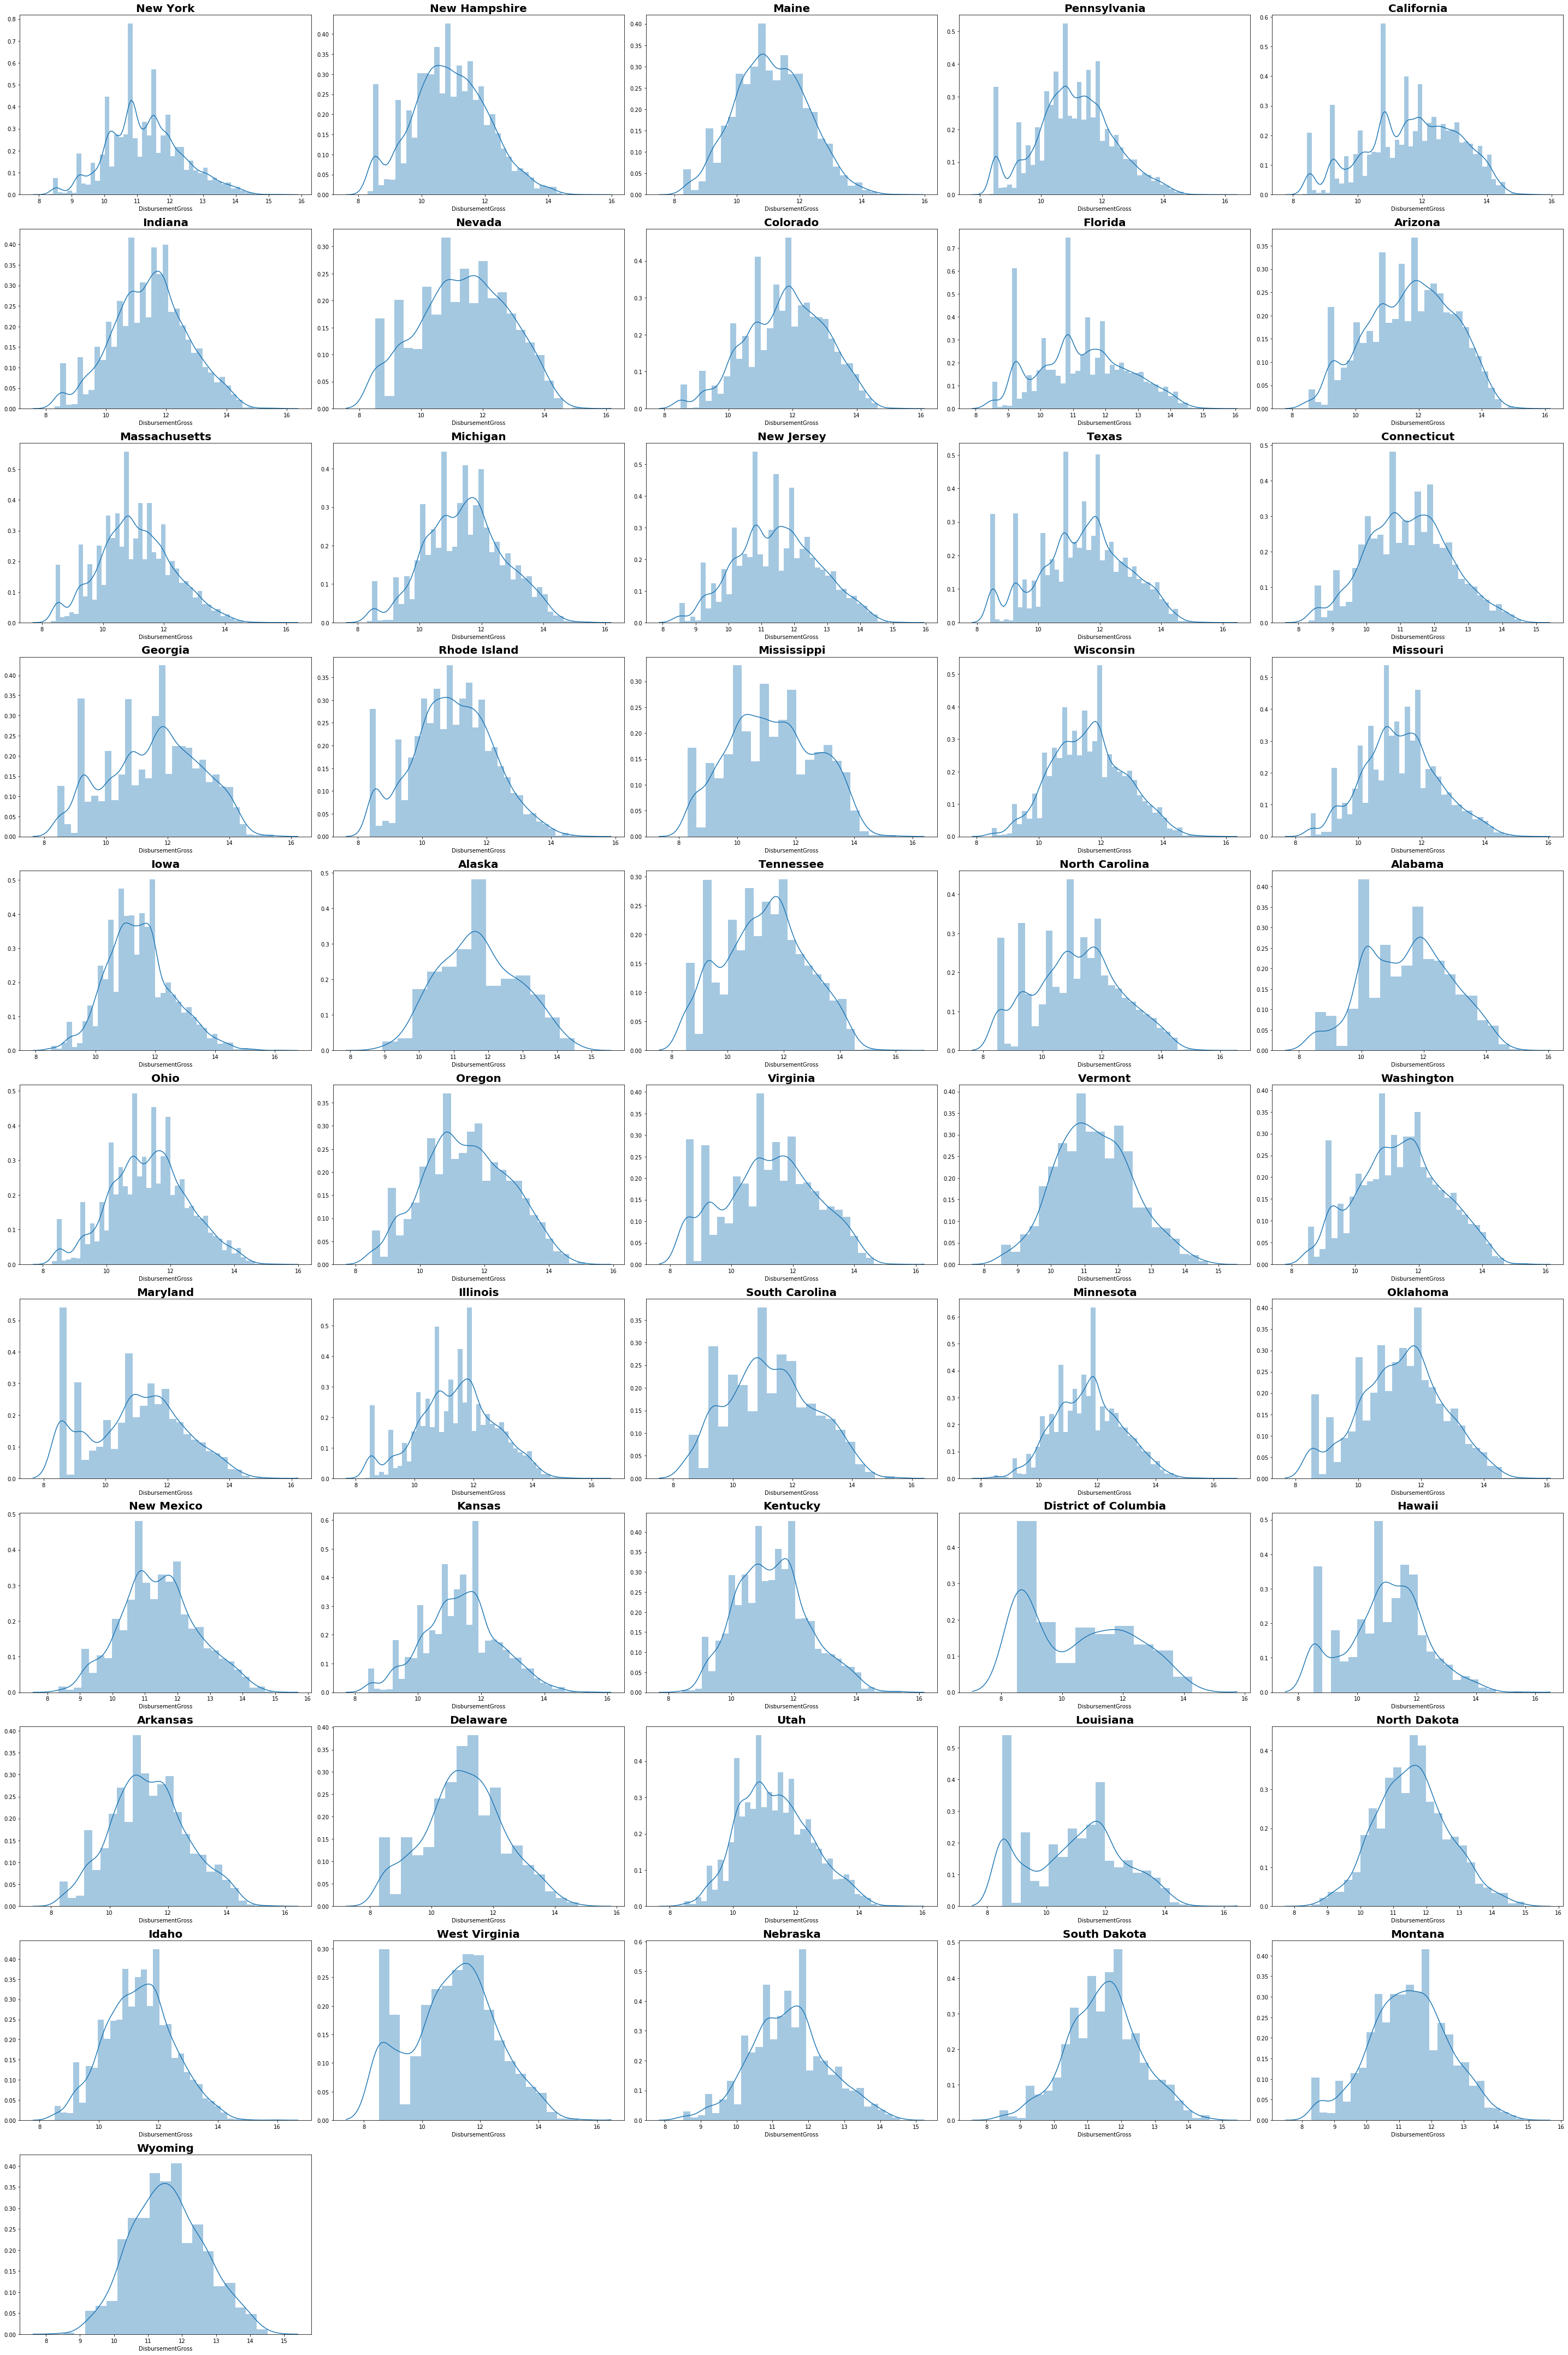

In [31]:
# -- list of unique state
state_unique = list(df_final['State'].unique())

# -- visualization of distribution 
plt.figure(figsize=(40,60))
i = 1
for item in state_unique :
    subs = df_final[df_final['State'] == item]['DisbursementGross']
    plt.subplot(11,5,i)
    sns.distplot(np.log(subs)) #log because our without log seem its not normal
    plt.title(list(df_state_MIS[df_state_MIS['State'] == item]['StateName'])[0],fontweight='bold',fontsize=20) #df_state_MIS from above (map usa)
    i += 1 

plt.tight_layout()

> It looks like that most of them have normal distribution and it's a good sign of disbursement

### 2.4  Pairplot

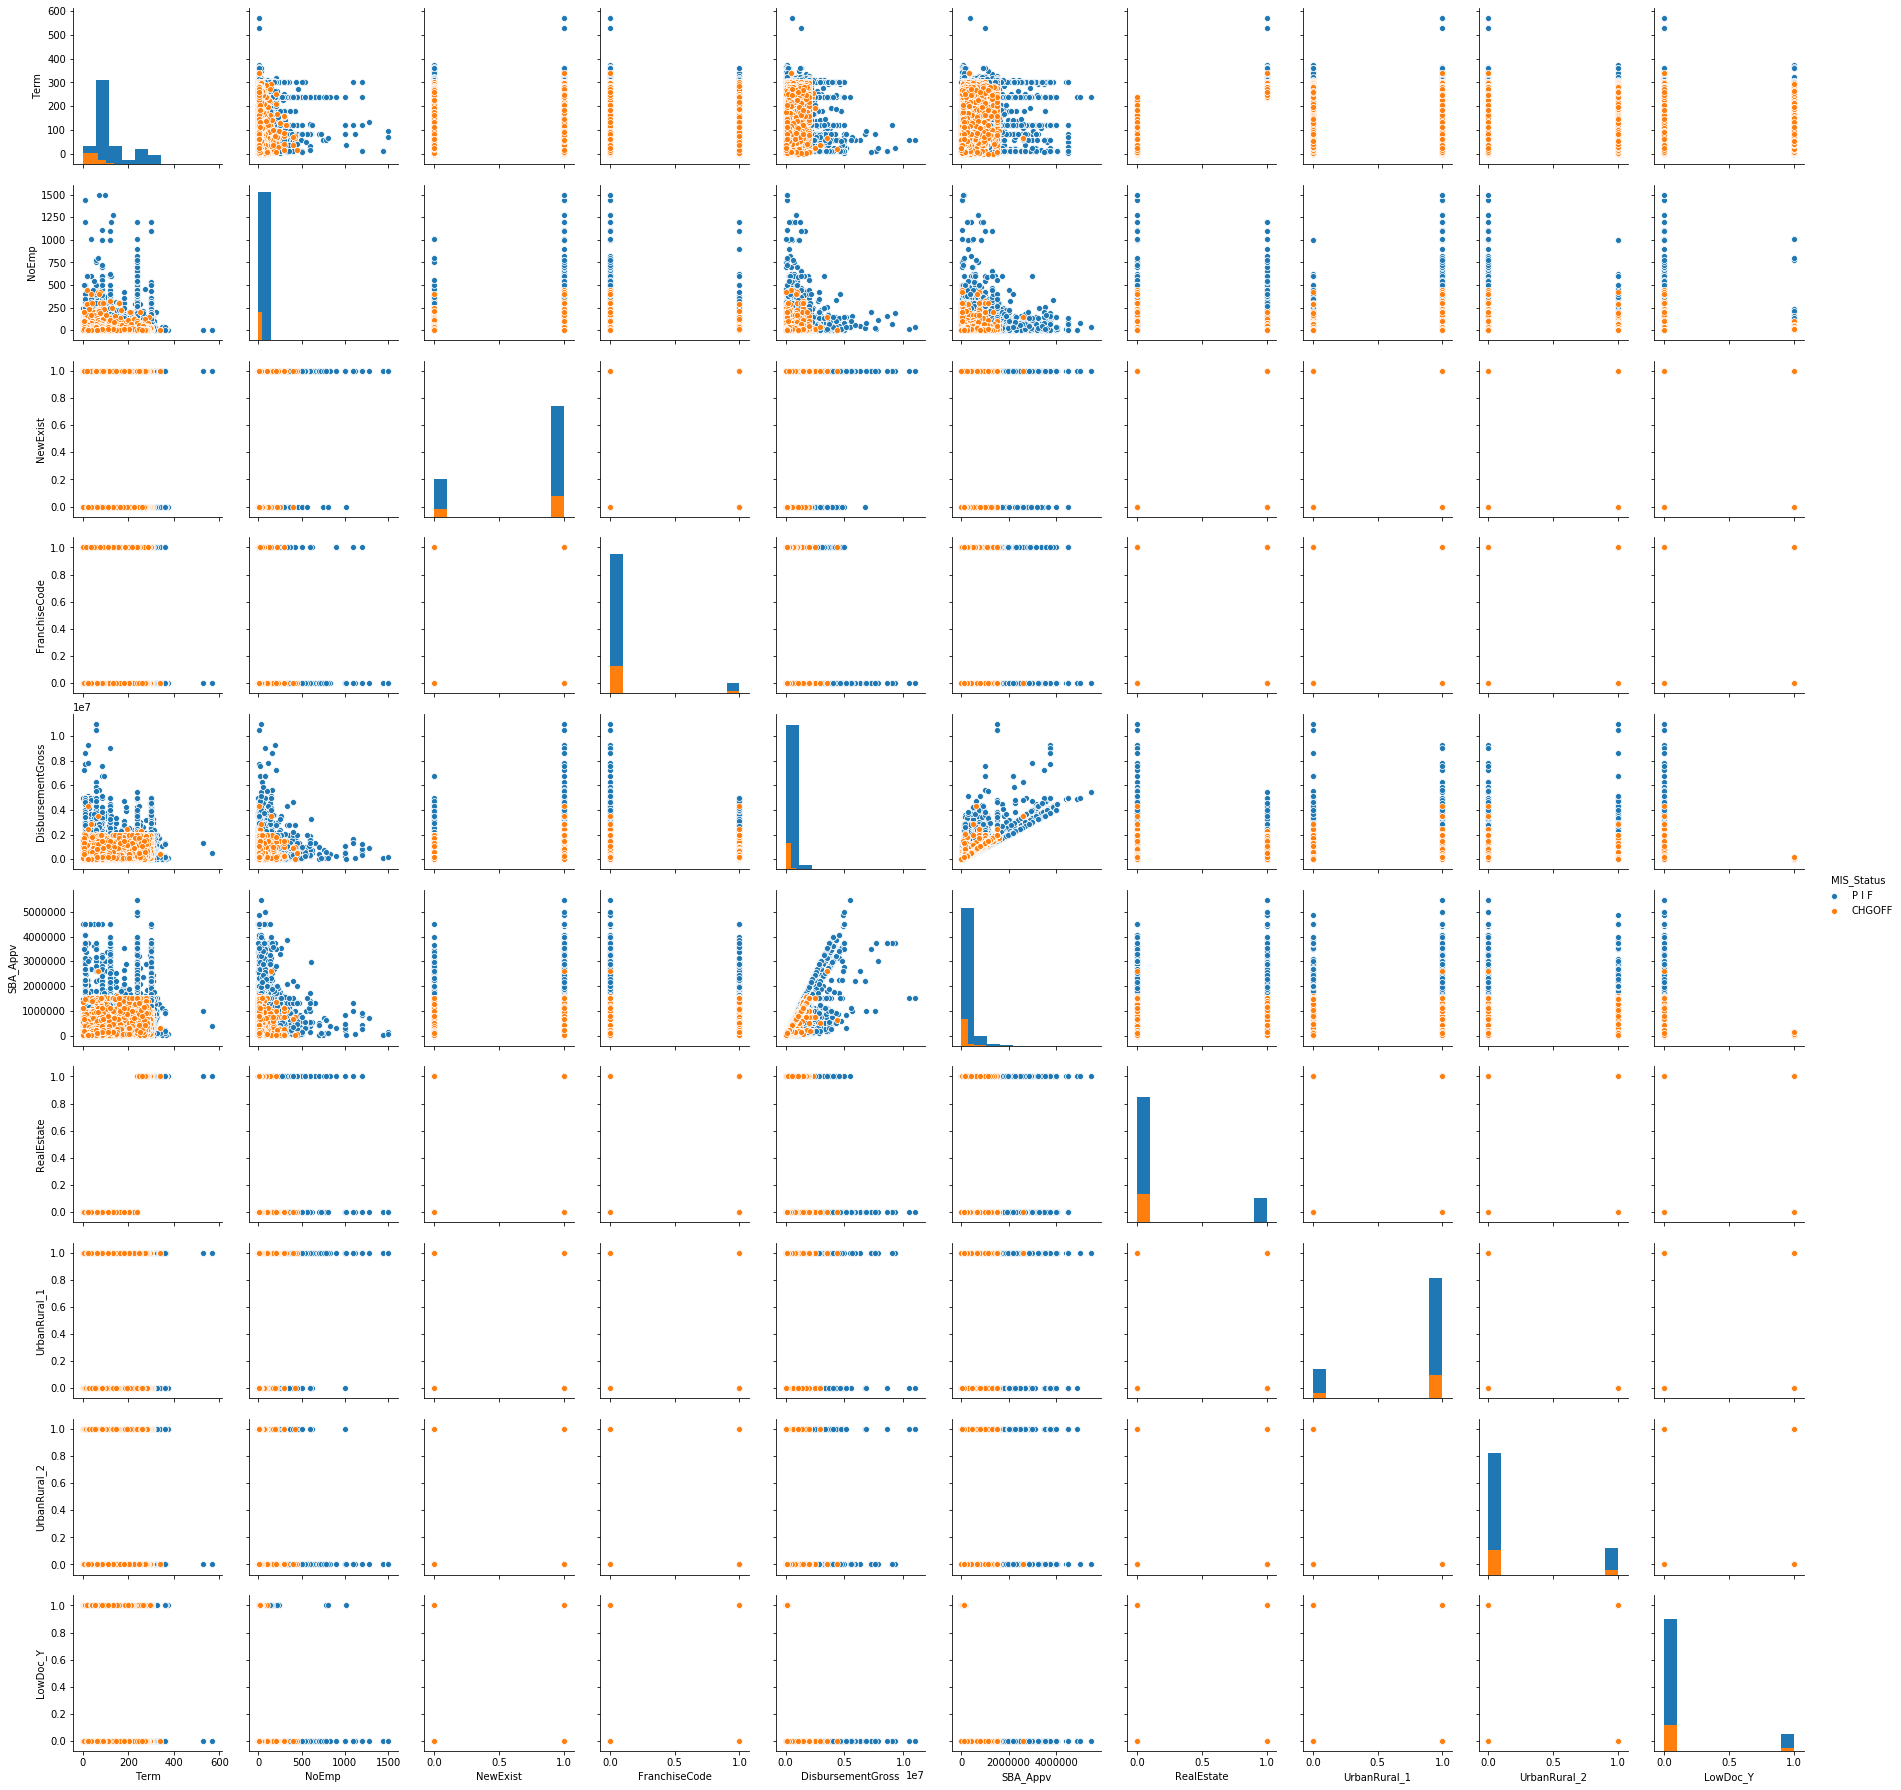

In [32]:
sns.pairplot(df_final[['Term','NoEmp','NewExist','FranchiseCode','DisbursementGross','SBA_Appv','RealEstate','UrbanRural_1','UrbanRural_2','LowDoc_Y','MIS_Status']],hue='MIS_Status',diag_kind='hist')

> From this we can see that, CGHOFF generally occurs on terms smaller than 300 months. While in other features, CHGOFF occurs almost entirely in DisbursementGross and SBA_appv under 2 million dollars.

### 2.5  Correlation Between Features (HeatMap)

Text(0.5, 1, 'Correlation Between Features')

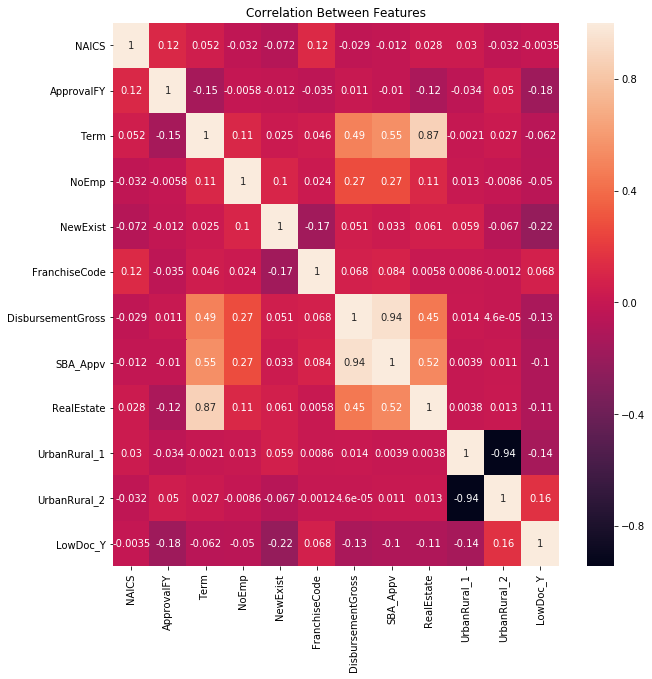

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True)
plt.title('Correlation Between Features')

> From the results of this correlation, one of the insights we can see that the term has a pretty good correlation to DisbursementGross. This makes sense, because the larger the DisbursementGross, the longer the borrower will usually take the time to pay it. The longer the time can exceed 240 months, which means it will be backed up by realEstate (the correlation with the terms is very good). Also, the larger the loan the greater the collateral that must be issued by the SBA.

> **Conclusion** : We have an assumption that the Term have correlation with DisbursementGross, it will give effect to SBAappr & RealEstate, and vice versa.

##### 2.5.1  To check the correlation between them we could use chi2 test

References : https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- H0 : The two samples are independent
- H1 : There is a dependency between the samples

In [34]:
# -- import chi squared
from scipy.stats import chi2_contingency

# -- chi squared contingecy
print('-----','Correlation between term and disbursement gross','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['DisbursementGross','Term']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

print()
print('-----','Correlation between term and SBA approval','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['SBA_Appv','Term']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

print()
print('-----','Correlation between disbursement gross and SBA_appv','-----' )
stat, p, dof, expected = chi2_contingency(df_final[['DisbursementGross','SBA_Appv']])
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

----- Correlation between term and disbursement gross -----
stat=78238456.349, p=0.000000
Probably dependent

----- Correlation between term and SBA approval -----
stat=109965395.839, p=0.000000
Probably dependent

----- Correlation between disbursement gross and SBA_appv -----
stat=3443609698.398, p=0.000000
Probably dependent


>  So this result prove our analysis that it has correlation between Term, DisbursementGross, and SBA_Appv  **(dependent)**

##### Export Final Data to CSV

In [35]:
# export df_final to csv
df_final.to_csv('df_fix.csv')